### Programming for Data Analysis Project

Author: Agnieszka Waszczuk

*** 
This repository is used for the project given by the lecture on Programming for <em><strong> Data Analysis module on Higher Diploma in Science in Computing in Data Analytics at ATU.</strong></em>

***

In [19]:
# Important library 

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os

### The EPICA deep Ice Cores 800KYr Deuterium Data and Temperature Estimates

This research article delves into the European Project for Ice Coring in Antarctica (EPICA), focusing on two pivotal deep ice cores drilled in Dome C and Dronning Maud Land (DML). With the primary goal of understanding climatic variations in the Southern Hemisphere, the Dome C core offers insights into global climate mechanisms over extensive cycles, while the DML core provides a detailed record for comparative analysis with Greenland records. Published in the Annals of Glaciology in 2004, this study contributes to the broader understanding of climate dynamics on the Antarctic continent[1].

Temperature was estimated after correction for sea-water isotopic composition (Bintanja et al, 2005) and for ice sheet elevation (Parrenin et al, 2007) on EDC3 age scale (Parrenin et al, 2007)[2].


[1]. https://www.cambridge.org/core/journals/annals-of-glaciology/article/epica-deep-ice-cores-first-results-and-perspectives/BFC6D11388E8723E5B6BE0978A39201B#

[2]. https://doi.pangaea.de/10.1594/PANGAEA.683655

In [20]:
# Read the text file into a DataFrame
df = pd.read_csv('data/EPICA Dome C Ice Core 800KYr 2007.txt', sep='\s+', skiprows=91).dropna()
df=df.drop(['Bag','ztop','Deuterium'],axis=1)
df = pd.read_csv('data/EPICA Dome C Ice Core 800KYr 2007.txt', sep='\s+', skiprows=91).dropna()
df=df.drop(['Bag','ztop','Deuterium'],axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5785 entries, 12 to 5799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          5785 non-null   float64
 1   Temperature  5785 non-null   float64
dtypes: float64(2)
memory usage: 135.6 KB


In [21]:
# Checking for null entries in each column
null_counts = df.isnull().sum()
# Display the count of null values in each column
print("Null counts in each column:")
print(null_counts)

Null counts in each column:
Age            0
Temperature    0
dtype: int64


In [22]:
df.head(10)

,Age,Temperature
12,38.37379,0.88
13,46.81203,1.84
14,55.05624,3.04
15,64.41511,0.35
16,73.15077,-0.42
17,81.93244,0.05
18,90.75925,0.05
19,99.97031,-0.52
20,109.88879,0.79
21,119.25888,-0.55


#### Histogram for Temperature and Age 



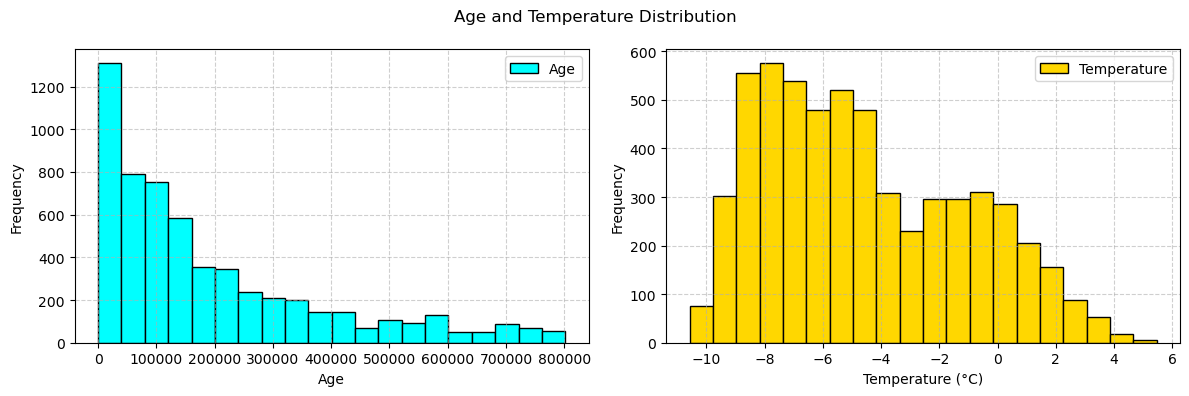

In [23]:
# Histogram for temperature data
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Age histogram
axs[0].hist(df['Age'], label="Age", bins=20, color='aqua', edgecolor='black')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')
# Add legend 
axs[0].legend()
# Add grid
axs[0].grid(True, linestyle='--', alpha=0.6)  # Add grid

# Temperature histogram
axs[1].hist(df['Temperature'], label="Temperature", bins=20, color= 'gold', edgecolor='black')
axs[1].set_xlabel('Temperature (°C)')
axs[1].set_ylabel('Frequency')
# Add legend 
axs[1].legend()
# Add grid
axs[1].grid(True, linestyle='--', alpha=0.6)  # Add grid

# Addig title
plt.suptitle("Age and Temperature Distribution")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
#Summary statistics 
df.describe()


,Age,Temperature
count,5785.000000,5785.000000
mean,190506.560624,-4.580228
std,192554.547328,3.446971
min,38.373790,-10.580000
25%,46793.812500,-7.450000
50%,122110.190000,-5.200000
75%,273338.430000,-1.820000
max,801662.000000,5.460000


In [25]:
# Folder location
input_folder = r'C:\Users\PC\DA\PDA_Project_2\data'

# files names
filename01='41586_2008_BFnature06949_MOESM31_ESM.xls'
filename02='epicaDC.deuttemp.EDC3-AICC.xls'
filename03='grl52461-sup-0003-supplementary.xls'

In [26]:
pip install xlrd
conda install -c conda-forge xlrd


!pip install xlrd


SyntaxError: invalid syntax (3140931308.py, line 1)

In [ ]:
# READ THE THE SHEETS FROM FILES

# 3 sheets from first file
co2_new = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='1.  new CO2 data',skiprows=6)
vostok = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='2.  Vostok-TD-Dome C',skiprows=6)
co2_composite = pd.read_excel(os.path.join(input_folder,filename01),sheet_name='3.  Composite CO2',skiprows=6)

### 2 Composite CO2 Data 
    
    

In [ ]:
co2_composite.info()


In [ ]:
co2_composite.head()


In [ ]:
# Checking for null entries
print(co2_composite.isnull().sum())

The output indicates there are no null entries for "year" or "CO2 (ppmv)" columns.

In [ ]:
#Summary statistics 
co2_composite.describe()


In [ ]:
# Reanme column EDC3 as year
co2_composite.rename(columns={'EDC3_gas_a (yr)': 'year'}, inplace=True)

# Add plotting
plt.figure(figsize=(10, 6)) # set up size of the figure 
plt.plot(co2_composite['year'], co2_composite['CO2 (ppmv)'], marker='o', color='blue')
# Add label
plt.xlabel('Year')
plt.ylabel('CO2 (ppmv)')
# Add title
plt.title('Relationship between Year and CO2')
# Add grid 
plt.grid(True)
plt.show()



### 3. Epica 

In [ ]:
# Second file
epica = pd.read_excel(os.path.join(input_folder,filename02))


In [ ]:
epica.info()

In [ ]:
epica.head()


In [ ]:
# Checking for null entries
print(epica.isnull().sum())

The column deutfinal has 15 null entries. 

In [ ]:
#Droping the rows with null values
epica = epica.dropna(subset=['deutfinal'])


In [ ]:
#Summary statistics 
epica.describe()

In [ ]:
# 2 sheets from third file
sup_all_records=pd.read_excel(os.path.join(input_folder,filename03),sheet_name='all records',skiprows=6)
co02_composite02=pd.read_excel(os.path.join(input_folder,filename03),sheet_name='CO2 Composite',skiprows=14)

#### Co02 composit 

In [ ]:
co02_composite02.info()

In [ ]:
co02_composite02.head()

In [ ]:
# Checking for null entries
print(co02_composite02.isnull().sum())

Data does not have missing values in these particular columns.

In [ ]:
# Checking column names
print(co02_composite02.columns)

# Display DataFrame information
co02_composite02.info()

# Print the first few rows
print(co02_composite02.head()) 
print(co02_composite02.columns)

# Display DataFrame information
co02_composite02.info()

# Print the first few rows
print(co02_composite02.head())

### Review data !! 

In [ ]:
# Remove leading and trailing whitespaces from column names
co02_composite02.columns = co02_composite02.columns.str.strip()

# Creating plot 
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot on the first y-axis
ax1.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['CO2 (ppmv)'], label='CO2_composite02', marker='.', color='blue')
ax1.set_xlabel('Gasage (yr BP)')
ax1.set_ylabel('CO2_composite02', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['sigma mean CO2 (ppmv)'], label='sigma mean CO2 (ppmv)', marker='*', color='red')
ax2.set_ylabel('sigma mean CO2 (ppmv)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

# Adding title of plot
plt.title('CO2 and Sigma Mean CO2 Over 800 Yaeras ')
plt.grid(True)
plt.show()


In [ ]:

# Remove leading and trailing whitespaces from column names
co02_composite02.columns = co02_composite02.columns.str.strip()

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot CO2 and Gasage on the same axes
ax.plot(co02_composite02['Gasage (yr BP)'], co02_composite02['CO2 (ppmv)'], label='CO2_composite02', marker='.', color='blue')

# Set labels and legend 
ax.set_xlabel('Gasage (yr BP)')
ax.set_ylabel('CO2_composite02', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.legend(loc='upper left')

# Adding title 
plt.title('CO2_composite02 Over Time')
plt.grid(True)
plt.show()


# Data grl52461

In [58]:
# Read all columns 
sup_all_records.head()

,Year,"Gasage (EDC3, yr BP)","Gasage (AICC2012, yr BP)",CO2 (ppmv),sigma mean CO2 (ppmv),Depth (m).1,"Gasage (EDC3, yr BP).1","Gasage (AICC2012, yr BP).1",CO2 (ppmv).1,Depth (m).2,...,"Gasage (WDC06A-7, yr BP).1",CO2 (ppmv).19,sigma mean CO2 (ppmv).16,Depth (m).19,"Gasage (AICC2012, yr BP).13",corrected CO2 (ppmv),analytical sigma mean CO2 (ppmv),Correcting Factor (ppmv),lower bound (2 sigma) of correction F. (ppmv),upper bound (2 sigma) of correction F. (ppmv)
0,102.83,137.0,350.110103,280.4,1.8,149.1,2690.0,NaN,284.7,380.82,...,8893.213,267.902828,3.369565,2950.5275,562654.671212,234.065089,0.938515,0.0,0.0,0.45076
1,106.89,268.0,486.693200,274.9,0.7,173.1,3897.0,3661.9285,272.7,382.42,...,8985.488,265.447325,1.429392,2951.8225,563135.783333,240.114724,2.126252,0.0,0.0,0.49078
2,107.20,279.0,501.195000,277.9,0.7,177.4,4124.0,3746.6270,268.1,382.76,...,9080.986,268.861214,1.418332,2952.9225,563536.650000,242.288114,0.513847,0.0,0.0,0.52478
3,110.25,395.0,539.649455,279.1,1.3,228.6,6735.0,6449.1760,262.2,383.54,...,9176.945,263.952432,1.853741,2954.0225,563928.766667,245.694323,1.769919,0.0,0.0,0.55879
4,110.50,404.0,539.894909,281.9,1.1,250.3,7873.0,7567.3510,254.5,385.33,...,9274.864,270.597511,3.848356,2955.1225,564311.433333,245.812943,0.493195,0.0,0.0,0.59281


In [83]:
print(sup_all_records.columns)


Index(['Year', 'Gasage (EDC3, yr BP)', 'Gasage (AICC2012, yr BP)'], dtype='object')


In [39]:
# Read only 3 columns
subset_dataframe = sup_all_records[selected_columns]

# Display the subset with the selected columns
print(subset_dataframe)

     Depth (m)  Gasage (EDC3, yr BP)  CO2 (ppmv)
0       102.83                 137.0       280.4
1       106.89                 268.0       274.9
2       107.20                 279.0       277.9
3       110.25                 395.0       279.1
4       110.50                 404.0       281.9
..         ...                   ...         ...
387        NaN                   NaN         NaN
388        NaN                   NaN         NaN
389        NaN                   NaN         NaN
390        NaN                   NaN         NaN
391        NaN                   NaN         NaN

[392 rows x 3 columns]


In [79]:
subset_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sigma mean CO2 (ppmv)  183 non-null    float64
 1   CO2 (ppmv)             183 non-null    float64
dtypes: float64(2)
memory usage: 6.2 KB


In [87]:
# Assuming you have a DataFrame named 'sup_all_records'
sup_all_records.rename(columns={sup_all_records.columns[0]: 'Year'}, inplace=True)

# Display the DataFrame with the updated column name
print(sup_all_records)

updated_dataframe = sup_all_records.rename(columns={sup_all_records.columns[0]: 'Year'})



       Year  Gasage (EDC3, yr BP)  Gasage (AICC2012, yr BP)
0    102.83                 137.0                350.110103
1    106.89                 268.0                486.693200
2    107.20                 279.0                501.195000
3    110.25                 395.0                539.649455
4    110.50                 404.0                539.894909
..      ...                   ...                       ...
387     NaN                   NaN                       NaN
388     NaN                   NaN                       NaN
389     NaN                   NaN                       NaN
390     NaN                   NaN                       NaN
391     NaN                   NaN                       NaN

[392 rows x 3 columns]


In [76]:
#Summary statistics 
subset_dataframe.describe()

,sigma mean CO2 (ppmv),CO2 (ppmv)
count,183.000000,183.000000
mean,0.781421,250.746448
std,0.352673,29.107377
min,0.100000,184.400000
25%,0.500000,238.450000
50%,0.700000,262.300000
75%,1.000000,270.900000
max,2.000000,282.200000
